In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
data=pd.read_csv("./possum.csv")

In [76]:
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [77]:
#pre-processing
#Handling null values
columns=list(data.columns.values)

In [78]:
columns

['case',
 'site',
 'Pop',
 'sex',
 'age',
 'hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

In [96]:
#count nan
nans=data[columns].isna().sum()

In [97]:
nans

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [81]:
data['totlngth']

0      89.0
1      91.5
2      95.5
3      92.0
4      85.5
       ... 
99     81.5
100    82.5
101    89.0
102    82.5
103    89.0
Name: totlngth, Length: 104, dtype: float64

In [82]:
#continous data replace nan with mean
mean1=np.mean(data['totlngth'])

data['totlngth']=data['totlngth'].fillna(mean1)

In [83]:
data['age']

0      8.0
1      6.0
2      6.0
3      6.0
4      2.0
      ... 
99     1.0
100    1.0
101    6.0
102    4.0
103    3.0
Name: age, Length: 104, dtype: float64

In [84]:
np.max(data['age'])

9.0

In [85]:
np.min(data['age'])

1.0

In [86]:
np.std(data['age'])

1.8998623961179415

In [87]:
np.mean(data['age'])

3.8333333333333335

(array([10., 16., 27., 14.,  0., 13., 12.,  7.,  1.,  2.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

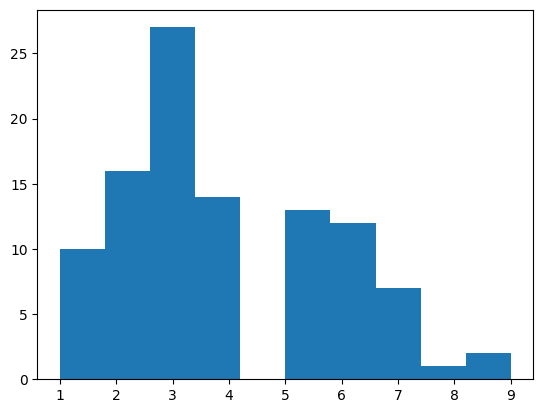

In [88]:
plt.hist(data['age'])

In [89]:
mean=np.mean(data['age'])
median=np.mean(data['age'])

In [90]:
data['age']=data['age'].fillna(mean)

(array([10., 16., 27., 16.,  0., 13., 12.,  7.,  1.,  2.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

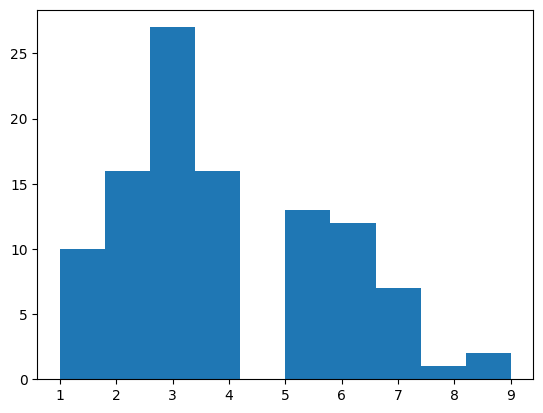

In [91]:
plt.hist(data['age'])

<BarContainer object of 104 artists>

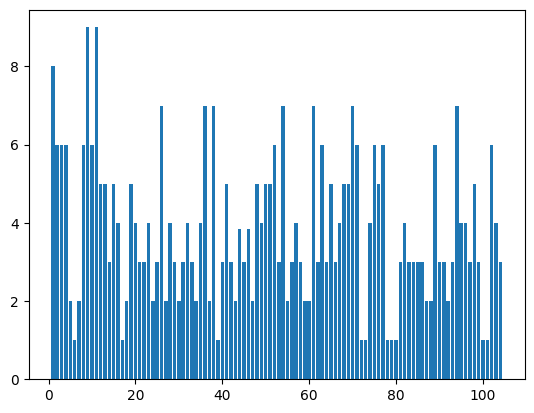

In [92]:
plt.bar(data['case'],data['age'])

In [93]:
data['footlgth']

0      74.5
1      72.5
2      75.4
3      76.1
4      71.0
       ... 
99     66.0
100    64.4
101    63.5
102    62.9
103    67.6
Name: footlgth, Length: 104, dtype: float64

In [94]:
mean3=np.mean(data['footlgth'])
data['footlgth']=data['footlgth'].fillna(mean3)

<Axes: ylabel='Density'>

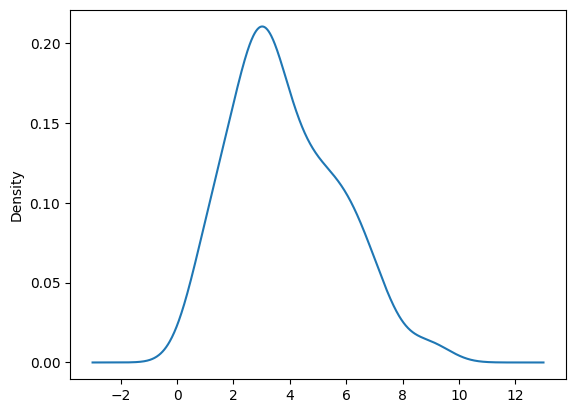

In [95]:
data['age'].plot(kind='kde')

In [100]:
data['Pop']

0        Vic
1        Vic
2        Vic
3        Vic
4        Vic
       ...  
99     other
100    other
101    other
102    other
103    other
Name: Pop, Length: 104, dtype: object

(array([46.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

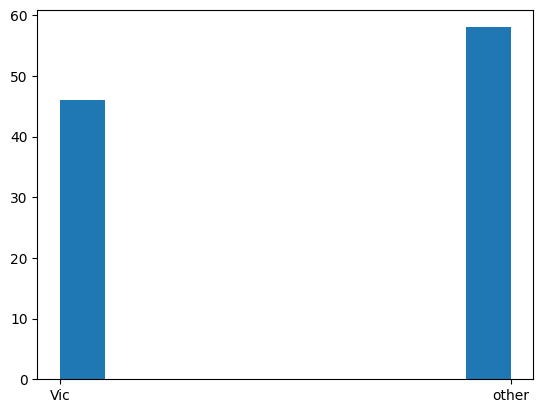

In [101]:
plt.hist(data['Pop'])

In [102]:
#Assign 1 to other and 0 to vic
mapping={'Vic':0,'other':1}

data['Pop']=data['Pop'].map(mapping)

(array([61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 43.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

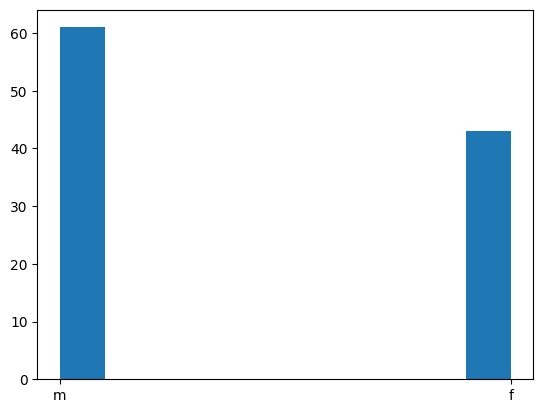

In [104]:
plt.hist(data['sex'])

In [106]:
mapping2={'m':1,'f':0}
data['sex']=data['sex'].map(mapping2)

In [107]:
data.corr()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,0.860281,0.253980,-0.194404,-0.209177,-0.125065,-0.334329,0.315351,-0.781811,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,0.892326,0.232817,-0.130799,-0.163646,-0.083548,-0.260843,0.380444,-0.781171,-0.790716,-0.036987,-0.345494,-0.175266
Pop,0.860281,0.892326,1.000000,0.195811,-0.085747,0.001267,0.065908,-0.078666,0.490856,-0.788286,-0.883293,0.148594,-0.194957,-0.024788
sex,0.253980,0.232817,0.195811,1.000000,-0.063995,0.107200,0.080014,-0.160200,-0.040917,-0.122964,-0.091559,0.188371,-0.139074,-0.090777
age,-0.194404,-0.130799,-0.085747,-0.063995,1.000000,0.311848,0.279955,0.250970,0.117274,0.125314,0.052943,0.234669,0.325303,0.345825
hdlngth,-0.209177,-0.163646,0.001267,0.107200,0.311848,1.000000,0.710827,0.691094,0.287429,0.388941,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.065908,0.080014,0.279955,0.710827,1.000000,0.526413,0.255921,0.275057,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,-0.078666,-0.160200,0.250970,0.691094,0.526413,1.000000,0.565646,0.442866,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.490856,-0.040917,0.117274,0.287429,0.255921,0.565646,1.000000,-0.126235,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.781811,-0.781171,-0.788286,-0.122964,0.125314,0.388941,0.275057,0.442866,-0.126235,1.000000,0.768986,0.005197,0.450590,0.301736


In [108]:
#from this correlation, the total length can be predicted
columns

['case',
 'site',
 'Pop',
 'sex',
 'age',
 'hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

In [109]:
#prepare for training
normalize=[ 'hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

for i in normalize:
    data[i]=(data[i]-np.mean(data[i]))/(np.std(data[i]))


In [111]:
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,0.420996,1.134883,0.445603,-0.517732,1.387779,1.557431,0.147177,0.491222,1.241874
1,2,1,0,0,6.0,-0.028932,0.231197,1.028384,-0.261331,0.928309,0.750501,0.912499,0.736833,0.150424
2,3,1,0,0,6.0,0.392875,1.005785,1.960834,1.020671,1.594541,0.921668,0.434173,1.473667,0.514241
3,4,1,0,0,6.0,0.167912,0.069825,1.144941,0.507870,1.755355,0.995025,0.147177,0.491222,0.514241
4,5,1,0,0,2.0,-0.310136,-0.188371,-0.370290,-0.517732,0.583706,1.239549,0.051512,0.736833,0.150424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1,1,1.0,-0.872546,-0.285195,-1.302740,-0.261331,-0.564970,-0.325405,-0.235484,-1.964889,-2.032475
100,101,7,1,1,1.0,-1.125630,-0.704763,-1.069627,1.020671,-0.932546,-0.031976,-1.000805,-0.982445,0.150424
101,102,7,1,0,6.0,-0.057052,-0.607940,0.445603,0.507870,-1.139308,-0.667739,-1.957457,-0.982445,-0.941025
102,103,7,1,1,4.0,-0.310136,-0.543391,-1.069627,-0.261331,-1.277149,-0.545477,0.338508,-0.982445,-1.304842


In [112]:
data.to_csv("./train.csv")